Camera Response Function (CRF) Analysis

This notebook uses the functions defined in `crf_analysis.py` to analyze and visualize Camera Response Functions (CRFs).


Available keys in the data file:
- key_0
- radiance_map_0
- response_curve_0
- z_min_0
- z_max_0
- intensity_samples_0
- log_exposures_0
- Zmin_sample_0
- Zmax_sample_0
- key_1
- radiance_map_1
- response_curve_1
- z_min_1
- z_max_1
- intensity_samples_1
- log_exposures_1
- Zmin_sample_1
- Zmax_sample_1
- key_2
- radiance_map_2
- response_curve_2
- z_min_2
- z_max_2
- intensity_samples_2
- log_exposures_2
- Zmin_sample_2
- Zmax_sample_2
- key_3
- radiance_map_3
- response_curve_3
- z_min_3
- z_max_3
- intensity_samples_3
- log_exposures_3
- Zmin_sample_3
- Zmax_sample_3
- key_4
- radiance_map_4
- response_curve_4
- z_min_4
- z_max_4
- intensity_samples_4
- log_exposures_4
- Zmin_sample_4
- Zmax_sample_4
- key_5
- radiance_map_5
- response_curve_5
- z_min_5
- z_max_5
- intensity_samples_5
- log_exposures_5
- Zmin_sample_5
- Zmax_sample_5
- key_6
- radiance_map_6
- response_curve_6
- z_min_6
- z_max_6
- intensity_samples_6
- log_exposures_6
- Zmin_sample_6
- Zmax_sample_6
- key_7
- radia

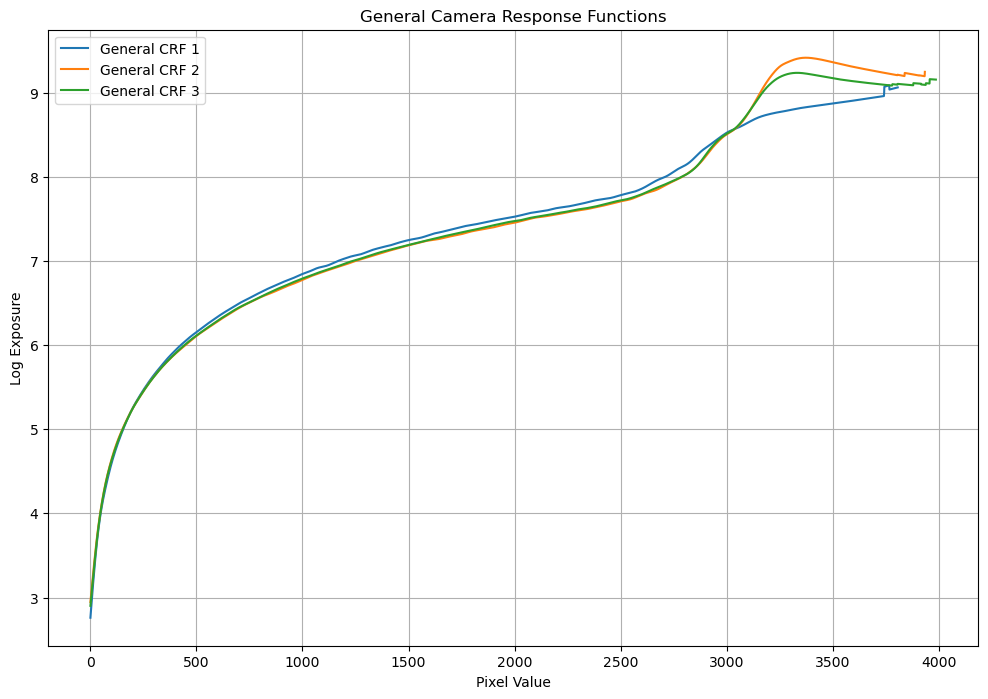

Error during analysis: adaptive_weight() takes 2 positional arguments but 4 were given
Please check the structure of your saved data and update the functions if necessary.


Traceback (most recent call last):
  File "/var/folders/gx/4gwwyrv10n9f3d2zmm71n9pm0000gq/T/ipykernel_58468/331239626.py", line 32, in <module>
    plot_adaptive_weighting(Smax, DC, exposure_time)
  File "/Users/allisondennis/Spectral_demixing/notebooks/PIPELINE/CRF_analysis.py", line 82, in plot_adaptive_weighting
    weights = adaptive_weight(pixel_values, Smax, DC, exposure_time)
TypeError: adaptive_weight() takes 2 positional arguments but 4 were given


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CRF_analysis import load_crf_data, analyze_crfs, generate_general_crf, plot_adaptive_weighting, plot_multiple_crfs

filename = '/Users/allisondennis/Library/CloudStorage/OneDrive-NortheasternUniversity/Shared Documents - Dennis Lab/Image processing/IR VIVO data/AMD/240329_Water_immersed/240819_from_denoised/final_data/Water_immersed_crf_data.npz'
try:
    intensity_samples, log_exposures, response_curves = load_crf_data(filename)

    # Analyze CRFs
    num_clusters = min(3, len(response_curves))  # Adjust number of clusters based on available CRFs
    labels, silhouette_avg = analyze_crfs(intensity_samples, log_exposures, response_curves, num_clusters)
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Cluster distribution: {np.bincount(labels)}")

    # Generate general CRFs
    general_crfs = generate_general_crf(response_curves, labels)

    plt.figure(figsize=(12, 8))
    for i, crf in enumerate(general_crfs):
        plt.plot(crf, label=f'General CRF {i+1}')
    plt.title('General Camera Response Functions')
    plt.xlabel('Pixel Value')
    plt.ylabel('Log Exposure')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot adaptive weighting function
    Zmax = 4500  # Maximum pixel value for 16-bit images
    plot_adaptive_weighting(Zmax)

    plot_multiple_crfs(response_curves, labels)

except Exception as e:
    print(f"Error during analysis: {e}")
    import traceback
    traceback.print_exc()
    print("Please check the structure of your saved data and update the functions if necessary.")